In [ ]:
# To access the images upload the data.zip file
# and run this line to extract it
!unzip data.zip

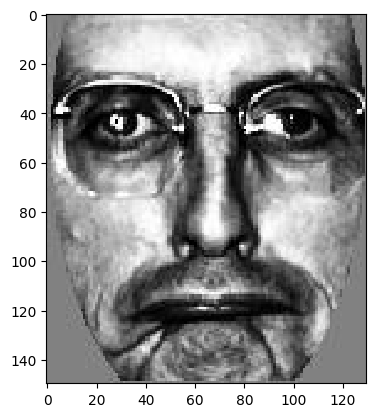

In [14]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.image as img
import os
import numpy as np

# Display an image from the training set
image = img.imread('data/Train1/00001fa010.930831.jpg')
plt.imshow(image, interpolation='nearest')
plt.show()

In [15]:
# Takes an image and changes the lighting so that the darkest pixel is
# brightness 0 and the lightest pixel is brightness 255
def process_face_vector(face_vector):
  face_vector = (face_vector - face_vector.min()) / (face_vector.max() - face_vector.min())
  return face_vector.flatten()

# Finds the "average" face by taking the average for every pixel
def comp_average(face_vectors):
    avg_vec = np.mean(face_vectors,axis=0)
    return avg_vec

face_vectors = []
folderPath = 'data/Train1'

# Processes the faces in the training set
for file in os.listdir(folderPath):
    img_path = os.path.join(folderPath, file)
    face_vector = plt.imread(img_path)
    face_vector = process_face_vector(face_vector)
    face_vectors.append(face_vector)

average_face_vector = comp_average(face_vectors)

In [16]:
# Subtracts the average face from the faces in the training set
def sub_mean(face_vectors, average_face_vector):
    faces_sub_mean = []
    for face_vector in face_vectors:
        faces_sub_mean.append(face_vector - average_face_vector)
    return np.array(faces_sub_mean)

sub_mean_face_vector = sub_mean(face_vectors, average_face_vector)

In [17]:
def normalize(v):
    norm = np.linalg.norm(v)
    if norm == 0:
       return v
    return v / norm

# Performs single value decomposition, making sure to use the set with the mean subtracted
U, S, V = np.linalg.svd(sub_mean_face_vector, full_matrices=False)
S = normalize(S)

In [34]:
# Projects a face onto subspace V using the k most important eigenvectors
# if k = width*length of the image then the projected image will not be compressed
# but if k < width*length then the dimensionality will be reduced to k
def project_face(face_vector, V, k):
   sub_mean_face = face_vector.flatten() - average_face_vector
   weights = np.dot(sub_mean_face, V[:k,:].T)
   return weights

# Reconstructs an image using the projected image, a subspace V, and the amount of
# eigenvectors used to project the face
def reconstruct_face(weights, V, k):
   reconstructed_vector = np.dot(weights, V[:k,:]) + average_face_vector
   reconstructed_image = reconstructed_vector.reshape(image.shape)
   return reconstructed_image

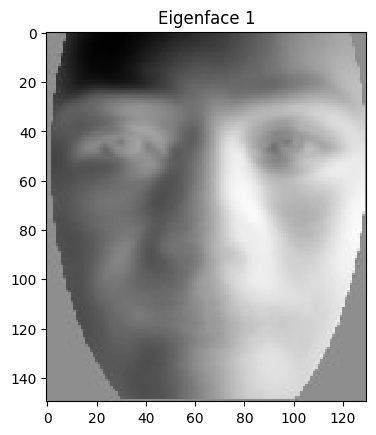

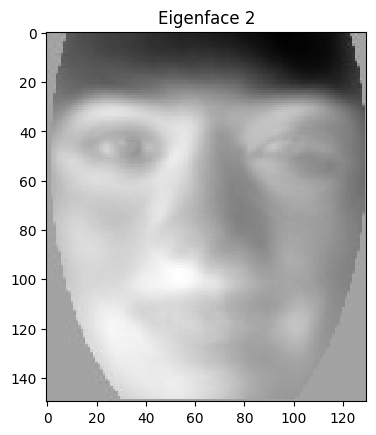

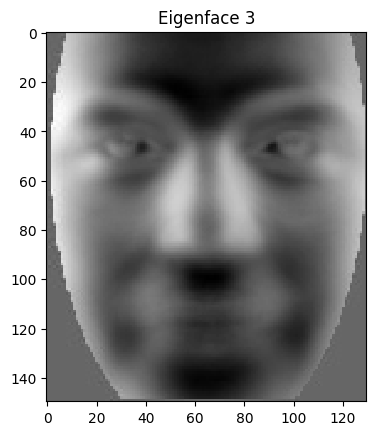

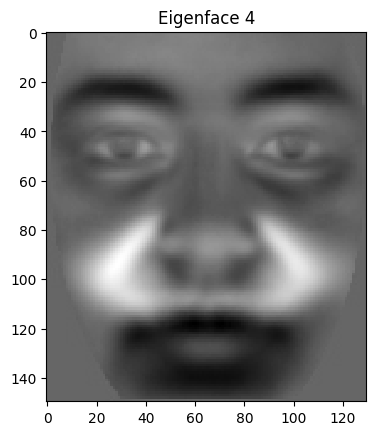

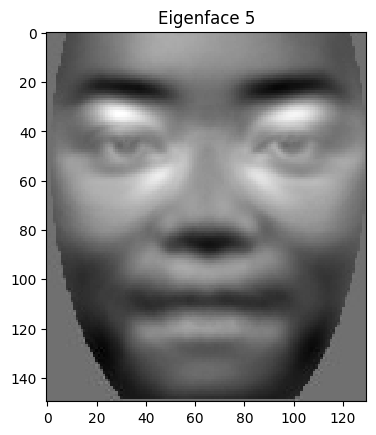

In [35]:
# Eigenface Display
for i in range(5):  # Displays the top 5 eigenfaces
    eigenface = V[i].reshape(image.shape)
    plt.imshow(eigenface, cmap='gray', interpolation='nearest')
    plt.title('Eigenface {}'.format(i+1))
    plt.show()

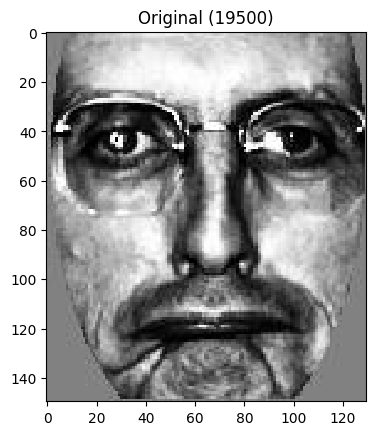

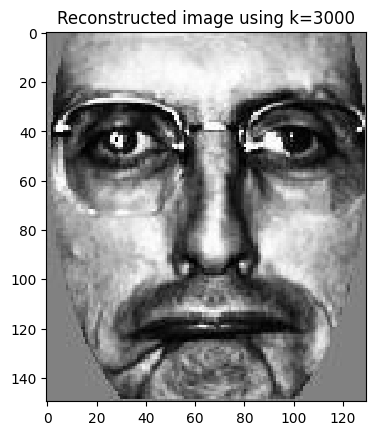

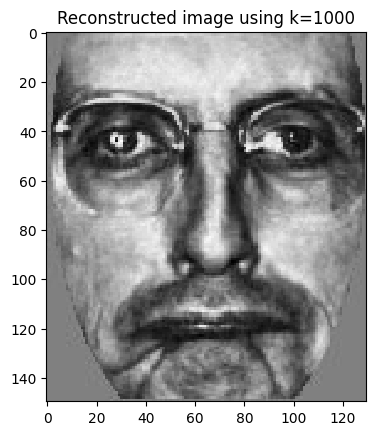

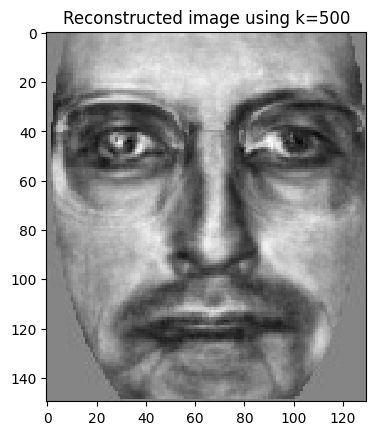

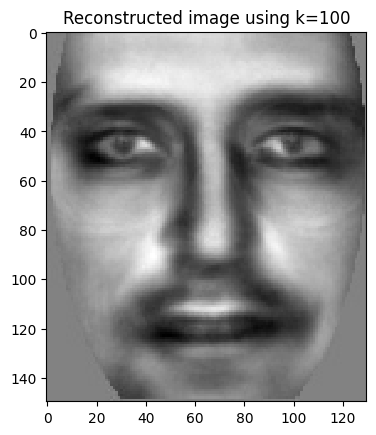

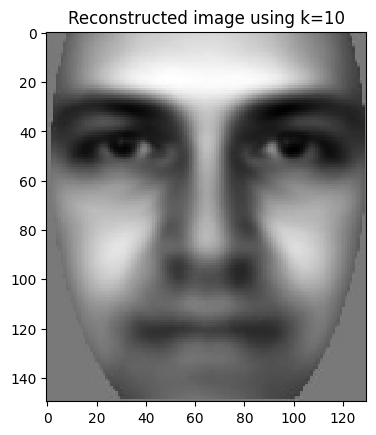

In [36]:
face = plt.imread('data/Train1/00001fa010.930831.jpg')
face_shape = face.shape
face = process_face_vector(face).reshape(face_shape)
plt.imshow(face, interpolation='nearest')
plt.title("Original (19500)")
plt.show()
ks = [3000, 1000, 500, 100, 10]
for k in ks:
  weights = project_face(face, V, k)
  reconstructed = reconstruct_face(weights, V, k)
  plt.imshow(reconstructed, interpolation='nearest')
  plt.title("Reconstructed image using k=" + str(k))
  plt.show()